In [2]:
import scimap as sm
import pandas as pd
import scanpy as sc
import numpy as np
import anndata as ad
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Running SCIMAP  2.0.5


In [8]:
df = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/combat_corrected/manual_phenotypes_standard_corrected.csv', index_col=0)

In [42]:
df

,CD38,Perilipin,Vimentin,B4GALT1,MPO,CathepsinK,ATP5A,RUNX2,HIF1A,CD11b,...,ST6GAL1,CD138,area,Y_centroid,X_centroid,axis_major_length,axis_minor_length,eccentricity,distance_to_bone,phenotype
index,,,,,,,,,,,,,,,,,,,,,
phenotyping_TS-373_IMC89_B_001_1,0.233939,0.095436,0.218223,0.113740,0.095801,0.016490,0.076973,-0.060434,0.015831,0.158127,...,-0.043492,0.289778,20,0.750000,148.100000,8.666077,3.055997,0.935759,795.186771,Plasma Cells/MM cells
phenotyping_TS-373_IMC89_B_001_2,0.220001,0.106157,0.232713,0.128790,0.094808,0.033499,0.085066,-0.053986,0.012817,0.164628,...,-0.024329,0.267080,19,0.842105,166.894737,8.095827,2.971326,0.930213,793.045396,Plasma Cells/MM cells
phenotyping_TS-373_IMC89_B_001_3,0.229884,0.091150,0.218740,0.114727,0.093117,0.029120,0.083648,-0.050383,0.049891,0.148480,...,-0.036111,0.283042,13,1.000000,274.846154,4.666385,3.843076,0.567221,789.496675,Plasma Cells/MM cells
phenotyping_TS-373_IMC89_B_001_4,0.253331,0.118287,0.207380,0.121057,0.097646,0.035162,0.095459,-0.038549,0.063207,0.165256,...,-0.041730,0.290806,14,0.928571,380.857143,5.449354,3.145851,0.816540,798.474796,Plasma Cells/MM cells
phenotyping_TS-373_IMC89_B_001_5,0.226479,0.100103,0.225915,0.103696,0.102378,0.012639,0.058741,-0.053703,0.017359,0.145117,...,-0.011646,0.313781,33,1.393939,94.121212,9.637148,4.395041,0.889953,803.697704,Plasma Cells/MM cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phenotyping_TS-373_IMC72_MGUS_002_9948,0.154282,0.086302,0.215727,0.101672,0.119750,0.021877,0.059163,-0.054578,0.159252,0.205426,...,-0.048666,0.113140,14,998.214286,265.571429,6.000000,3.077237,0.858465,288.105883,Macrophages/Monocytes
phenotyping_TS-373_IMC72_MGUS_002_9949,0.143362,0.136044,0.150213,0.091625,0.160058,0.003178,0.042503,-0.045830,0.168352,0.219932,...,-0.022412,0.104280,22,997.727273,353.863636,7.289212,3.804036,0.853024,202.773272,Neutrophils
phenotyping_TS-373_IMC72_MGUS_002_9950,0.151288,0.080993,0.167877,0.102035,0.165437,0.022932,0.057285,-0.058666,0.178438,0.245499,...,-0.045930,0.104654,16,997.937500,372.687500,5.794435,3.577641,0.786628,184.678098,Neutrophils


In [4]:
# Normalize the first 32 columns using arcsinh
df.iloc[:, :32] = np.arcsinh(df.iloc[:, :32])
# Create an AnnData object with the normalized data

In [9]:
# If there are additional columns that you want to include as metadata
adata = ad.AnnData(X=df.iloc[:, :32])
if df.shape[1] > 32:
    adata.obs = df.iloc[:, 32:]
    adata.obs['phenotype'] = adata.obs['phenotype'].astype('category')
sc.tl.dendrogram(adata, groupby='phenotype')
adata.obs['phenotype'] = adata.obs['phenotype'].astype('category')
sc.tl.dendrogram(adata, groupby='phenotype')

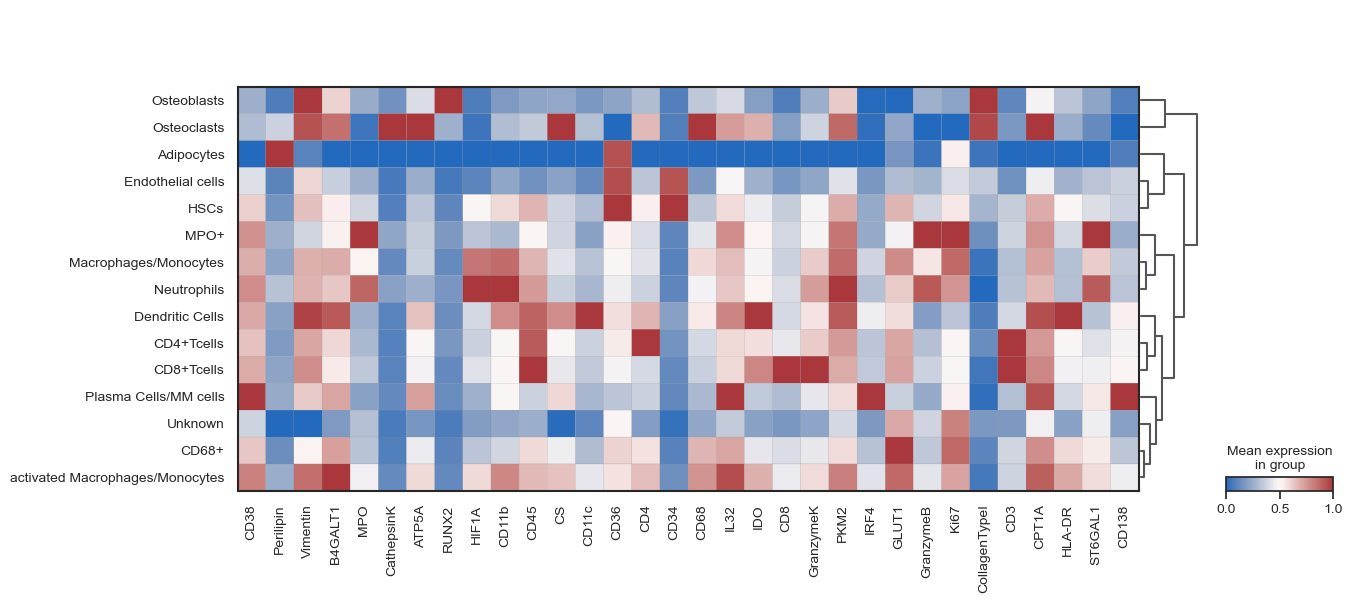

In [10]:
# Example: visualize the data, assuming 'group' is a column in adata.obs
sc.pl.matrixplot(adata, var_names=adata.var_names, groupby='phenotype', cmap="vlag", standard_scale="var", dendrogram=True)


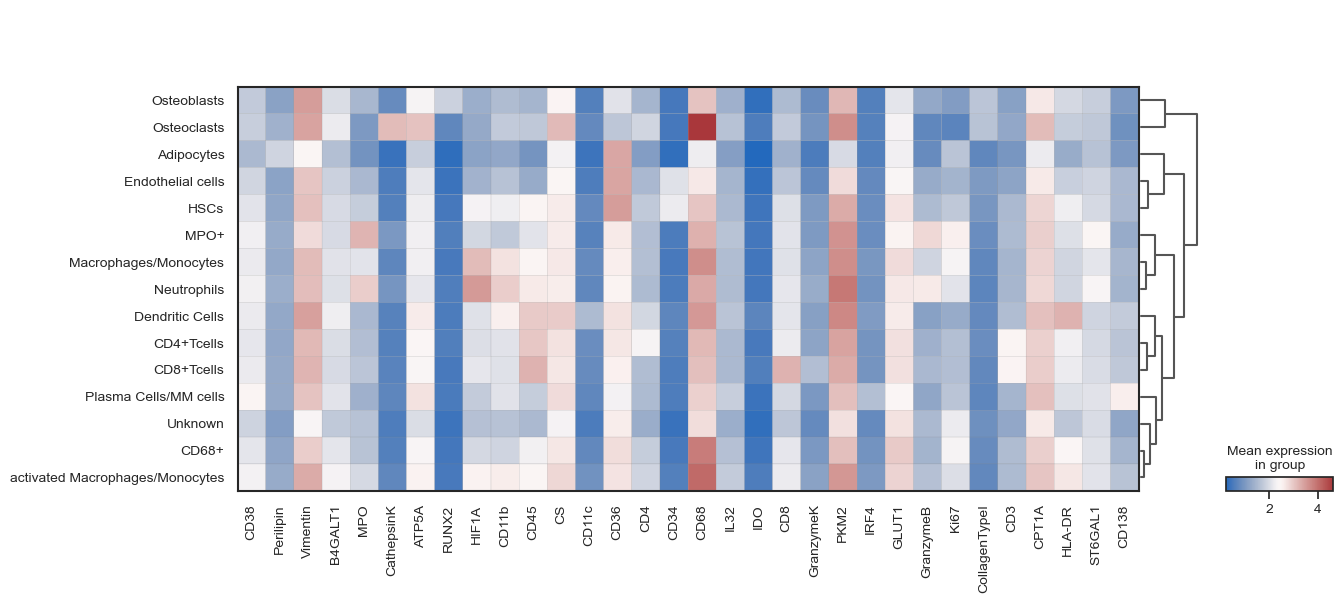

In [11]:
# Example: visualize the data, assuming 'group' is a column in adata.obs
sc.pl.matrixplot(adata, var_names=adata.var_names, groupby='phenotype', cmap="vlag", dendrogram=True)


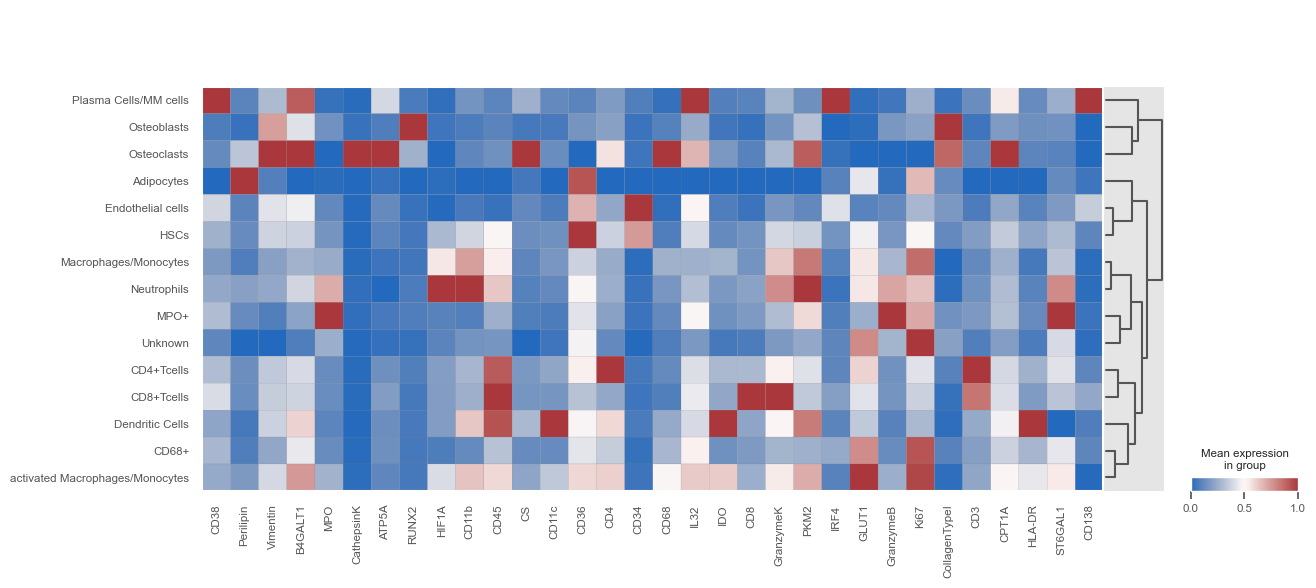

In [137]:
df = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/uncorrected/manual_phenotypes_standard.csv', index_col=0)
# Normalize the first 32 columns using arcsinh
marker_columns = df.columns[:32]

# Create a StandardScaler object
scaler = StandardScaler()

# Scale each marker column individually
for marker in marker_columns:
    df[marker] = scaler.fit_transform(df[[marker]])

# Create an AnnData object with the normalized data
adata = ad.AnnData(X=df[marker_columns])


# If there are additional columns that you want to include as metadata
if df.shape[1] > 32:
    adata.obs = df.iloc[:, 32:]
    adata.obs['phenotype'] = adata.obs['phenotype'].astype('category')
sc.tl.dendrogram(adata, groupby='phenotype')
# Example: visualize the data, assuming 'group' is a column in adata.obs
sc.pl.matrixplot(adata, var_names=adata.var_names, groupby='phenotype', cmap="vlag", standard_scale="var", dendrogram=True)


In [46]:
conditions = [
    df['phenotype'].isin(['Plasma Cells/MM cells']),
    df['phenotype'].isin(['CD3+Tcells', 'CD4+Tcells', 'CD8+Tcells']),
    df['phenotype'].isin(['HSCs', 'Endothelial cells', 'Adipocytes', 'Osteoblasts', 'Osteoclasts']),
    df['phenotype'].isin(['Unknown']) 
]

# Define the corresponding values for each condition
values = ['tumor', 'lymphocytes', 'stem_connectissue', 'unknown']

# Create the new 'lineage' column using np.select()
df['lineage'] = np.select(conditions, values, default='myeloid')

In [47]:
df

,CD38,Perilipin,Vimentin,B4GALT1,MPO,CathepsinK,ATP5A,RUNX2,HIF1A,CD11b,...,CD138,area,Y_centroid,X_centroid,axis_major_length,axis_minor_length,eccentricity,distance_to_bone,phenotype,lineage
index,,,,,,,,,,,,,,,,,,,,,
phenotyping_TS-373_IMC89_B_001_1,0.233939,0.095436,0.218223,0.113740,0.095801,0.016490,0.076973,-0.060434,0.015831,0.158127,...,0.289778,20,0.750000,148.100000,8.666077,3.055997,0.935759,795.186771,Plasma Cells/MM cells,tumor
phenotyping_TS-373_IMC89_B_001_2,0.220001,0.106157,0.232713,0.128790,0.094808,0.033499,0.085066,-0.053986,0.012817,0.164628,...,0.267080,19,0.842105,166.894737,8.095827,2.971326,0.930213,793.045396,Plasma Cells/MM cells,tumor
phenotyping_TS-373_IMC89_B_001_3,0.229884,0.091150,0.218740,0.114727,0.093117,0.029120,0.083648,-0.050383,0.049891,0.148480,...,0.283042,13,1.000000,274.846154,4.666385,3.843076,0.567221,789.496675,Plasma Cells/MM cells,tumor
phenotyping_TS-373_IMC89_B_001_4,0.253331,0.118287,0.207380,0.121057,0.097646,0.035162,0.095459,-0.038549,0.063207,0.165256,...,0.290806,14,0.928571,380.857143,5.449354,3.145851,0.816540,798.474796,Plasma Cells/MM cells,tumor
phenotyping_TS-373_IMC89_B_001_5,0.226479,0.100103,0.225915,0.103696,0.102378,0.012639,0.058741,-0.053703,0.017359,0.145117,...,0.313781,33,1.393939,94.121212,9.637148,4.395041,0.889953,803.697704,Plasma Cells/MM cells,tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phenotyping_TS-373_IMC72_MGUS_002_9948,0.154282,0.086302,0.215727,0.101672,0.119750,0.021877,0.059163,-0.054578,0.159252,0.205426,...,0.113140,14,998.214286,265.571429,6.000000,3.077237,0.858465,288.105883,Macrophages/Monocytes,myeloid
phenotyping_TS-373_IMC72_MGUS_002_9949,0.143362,0.136044,0.150213,0.091625,0.160058,0.003178,0.042503,-0.045830,0.168352,0.219932,...,0.104280,22,997.727273,353.863636,7.289212,3.804036,0.853024,202.773272,Neutrophils,myeloid
phenotyping_TS-373_IMC72_MGUS_002_9950,0.151288,0.080993,0.167877,0.102035,0.165437,0.022932,0.057285,-0.058666,0.178438,0.245499,...,0.104654,16,997.937500,372.687500,5.794435,3.577641,0.786628,184.678098,Neutrophils,myeloid


In [48]:
df['lineage'].isna().sum()

0

In [49]:
columns = df.columns.tolist()
columns[-1], columns[-2] = columns[-2], columns[-1]
df = df[columns]

In [50]:
df.to_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/scanorama_corrected/manual_phenotypes_standard_lineage_scancorrected.csv')